In [117]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing,HoltWintersResults
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ts_df = pd.read_csv('../data/tsdata.csv')

# write a function to loop over each custnum and create a dataframe create a list of dataframes, 
#then loop over list of dfs and fit/predict model and append results into results df



In [264]:
ts_df.groupby(ts_df.custnum).count()

saledate  Equipsales
custnum                      
100055          2           2
100056         45          45
100217          3           3
100253          5           5
100803         47          47
101434          1           1
102795         37          37
102865         16          16
104573         24          24
104798          1           1
104862          1           1
105642         35          35
105907          1           1
106031          1           1
106036         43          43
106606         14          14
106734          4           4
106779          7           7
107246         46          46
107267          1           1
107590         14          14
107715          6           6
107940          3           3
107951          3           3
107963         20          20
108000          1           1
108215          1           1
108216          1           1
108222          2           2
108804          1           1
...           ...         ...
254903          8           8
254922          8           8
255051          4           4
255053          3           3
255170         40          40
255237         18          18
255314         18          18
255364          9           9
255398          2           2
255679          3           3
255962         49          49
256127          9           9
256259         42          42
256268          4           4
256283         14          14
256356         12          12
256375         17          17
256382         50          50
256462         23          23
256519         50          50
256568          2           2
400400         50          50
400450          8           8
500500         43          43
600600         50          50
600680         29          29
700700         45          45
800800          1           1
900900         50          50
989950          4           4

[852 rows x 2 columns]

In [205]:
# ts_df.groupby(ts_df.custnum).count()

ts_df.saledate = pd.to_datetime(ts_df.saledate,yearfirst=True)

custlist= set(ts_df.custnum)


In [285]:
# for id in custlist:

ts_df_test = ts_df[ts_df.custnum==100803].sort_values(by='saledate').set_index('saledate',drop=True).drop(columns='custnum')





In [286]:
ts_df_test

Equipsales
saledate              
2015-01-01    99800.00
2015-02-01    81617.00
2015-04-01   399944.70
2015-05-01   169882.35
2015-06-01   386696.45
2015-07-01   362068.65
2015-08-01   214464.90
2015-09-01   148497.75
2015-10-01   125802.15
2015-11-01   124406.40
2015-12-01   141945.00
2016-01-01   171310.57
2016-02-01   356565.90
2016-03-01   128314.45
2016-04-01   121384.95
2016-05-01   247735.20
2016-06-01   275614.78
2016-07-01   214985.06
2016-08-01   286866.78
2016-09-01   198789.75
2016-10-01   110302.30
2016-11-01    79158.46
2016-12-01   122105.09
2017-01-01    82573.60
2017-03-01   424592.71
2017-04-01   238022.89
2017-05-01   214809.67
2017-06-01   314896.70
2017-07-01   210891.80
2017-08-01   259581.29
2017-09-01   124598.54
2017-10-01   154060.47
2017-11-01   238618.55
2017-12-01   110486.00
2018-01-01   227964.38
2018-03-01   280202.88
2018-04-01   502924.08
2018-05-01   634782.95
2018-06-01   737808.23
2018-07-01   525079.97
2018-08-01   455552.24
2018-09-01   320878.02
2018-10-01   472334.97
2018-11-01   451294.58
2018-12-01   199111.31
2019-01-01   323724.81
2019-02-01   122211.84

In [293]:
model = ExponentialSmoothing(ts_df_test.Equipsales,trend='add',seasonal='add',seasonal_periods=12)

c:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [294]:
fit = model.fit(use_boxcox=True)

start='2018-09-01'
end = '2019-04-01'

predict = fit.predict(start=start,end=end)

pred = pd.DataFrame(data=predict).rename(columns={0:'Equipsales'})


c:\Anaconda\lib\site-packages\scipy\stats\morestats.py:900: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
c:\Anaconda\lib\site-packages\scipy\optimize\optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
c:\Anaconda\lib\site-packages\scipy\optimize\optimize.py:1929: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)
c:\Anaconda\lib\site-packages\scipy\optimize\optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
c:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:726: RuntimeWarning: invalid value encountered in subtract
  season = (fitted - inv_boxcox(trend, lamda))[:i]


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

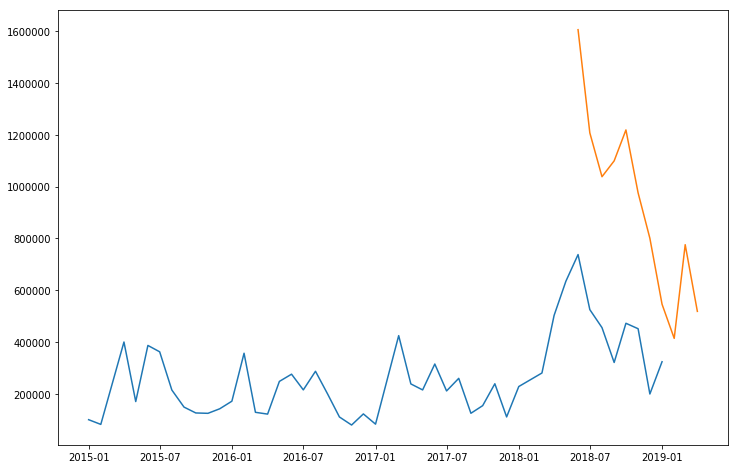

In [290]:
plt.figure(figsize=[12,8])
plt.plot(ts_df_test[:-1])
plt.plot(pred)



In [255]:
params = {
    'trend':'additive',
    'seasonal':'add',
    'seasonal_periods':12
}

HoltWintersResults(HW,params).summary()

In [231]:

resultsdf_list = []

for id in custlist:
    ts_df_test = ts_df[ts_df.custnum == id].sort_values(by='saledate').set_index('saledate',drop=True).drop(columns='custnum')
    
    model = ExponentialSmoothing(ts_df_test.Equipsales,trend='additive',seasonal='mul',seasonal_periods=12)
    
    fit = model.fit(use_boxcox=True)

    start='2018-11-01'
    end = '2019-09-01'

    predict = fit.predict(start=start,end=end)

    id = pd.DataFrame(data=predict).rename(columns={0:'Equipsales'})
    
    resutltsdf_list.append(id)

c:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\Anaconda\lib\site-packages\scipy\stats\morestats.py:900: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
c:\Anaconda\lib\site-packages\scipy\optimize\optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
c:\Anaconda\lib\site-packages\scipy\optimize\optimize.py:1929: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)
c:\Anaconda\lib\site-packages\scipy\optimize\optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
c:\Anaconda\lib\site-packages\scipy\optimize\optimize.py:1926: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)


ValueError: operands could not be broadcast together with shapes (0,) (6,) 